# Flight Ticket Price Prediction

## Problem Statement:

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)


**Dataset**

**Model Building Phase**
After collecting/scraping the data, we have around 1948 rows and 9 columns. We need to build a machine learning model. Before model building, we will be doing data pre-processing steps. We will try different models with different hyper parameters and select the best model.

Size of training dataset: 1948 records

## Features

Airline: The name of the airline.

Source: The source from which the service begins.

Destination: The destination where the service ends.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about meal on the flight

Price: The price of the ticket

## Importing important libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [46]:
flight_df = pd.read_csv("Flight price Dataset.csv")
flight_df

,Unnamed: 0,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
0,0,Air India,New Delhi,Mumbai,07:00,09:05,2h 05m,Non Stop,Free Meal,"4,065"
1,1,Air India,New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,Free Meal,"4,065"
2,2,Air India,New Delhi,Mumbai,09:00,11:15,2h 15m,Non Stop,Free Meal,"4,065"
3,3,Air India,New Delhi,Mumbai,14:00,16:15,2h 15m,Non Stop,Free Meal,"4,065"
4,4,Air India,New Delhi,Mumbai,21:15,23:35,2h 20m,Non Stop,Free Meal,"4,065"
...,...,...,...,...,...,...,...,...,...,...
1943,1943,IndiGo,Kolkata,Bagdogra,12:30,13:45,1h 15m,Non Stop,No info,"5,242"
1944,1944,Go First,Kolkata,Pune,10:20,13:05,2h 45m,Non Stop,No info,"4,975"
1945,1945,IndiGo,Kolkata,Pune,21:05,23:40,2h 35m,Non Stop,No info,"4,976"
1946,1946,IndiGo,Kolkata,Pune,09:15,13:10,3h 55m,1 Stop,No info,"5,720"


In [47]:
# Dropping the unwanted column 'Unnamed'
flight_df.drop("Unnamed: 0",axis =1,inplace = True)
flight_df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
0,Air India,New Delhi,Mumbai,07:00,09:05,2h 05m,Non Stop,Free Meal,"4,065"
1,Air India,New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,Free Meal,"4,065"
2,Air India,New Delhi,Mumbai,09:00,11:15,2h 15m,Non Stop,Free Meal,"4,065"
3,Air India,New Delhi,Mumbai,14:00,16:15,2h 15m,Non Stop,Free Meal,"4,065"
4,Air India,New Delhi,Mumbai,21:15,23:35,2h 20m,Non Stop,Free Meal,"4,065"
...,...,...,...,...,...,...,...,...,...
1943,IndiGo,Kolkata,Bagdogra,12:30,13:45,1h 15m,Non Stop,No info,"5,242"
1944,Go First,Kolkata,Pune,10:20,13:05,2h 45m,Non Stop,No info,"4,975"
1945,IndiGo,Kolkata,Pune,21:05,23:40,2h 35m,Non Stop,No info,"4,976"
1946,IndiGo,Kolkata,Pune,09:15,13:10,3h 55m,1 Stop,No info,"5,720"


In [48]:
flight_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
0,Air India,New Delhi,Mumbai,07:00,09:05,2h 05m,Non Stop,Free Meal,"4,065"
1,Air India,New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,Free Meal,"4,065"
2,Air India,New Delhi,Mumbai,09:00,11:15,2h 15m,Non Stop,Free Meal,"4,065"
3,Air India,New Delhi,Mumbai,14:00,16:15,2h 15m,Non Stop,Free Meal,"4,065"
4,Air India,New Delhi,Mumbai,21:15,23:35,2h 20m,Non Stop,Free Meal,"4,065"


In [49]:
flight_df.shape

(1948, 9)

In [50]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1948 non-null   object
 1   Source           1948 non-null   object
 2   Destination      1948 non-null   object
 3   Dep_Time         1948 non-null   object
 4   Arrival_Time     1948 non-null   object
 5   Duration         1948 non-null   object
 6   Total_Stops      1948 non-null   object
 7   Additional_Info  1769 non-null   object
 8   Price (in ₹)     1948 non-null   object
dtypes: object(9)
memory usage: 137.1+ KB


In [51]:
flight_df.isnull().sum()

Airline              0
Source               0
Destination          0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    179
Price (in ₹)         0
dtype: int64

In [52]:
flight_df['Additional_Info']=flight_df['Additional_Info'].replace('No info', np.nan)
flight_df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
0,Air India,New Delhi,Mumbai,07:00,09:05,2h 05m,Non Stop,Free Meal,"4,065"
1,Air India,New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,Free Meal,"4,065"
2,Air India,New Delhi,Mumbai,09:00,11:15,2h 15m,Non Stop,Free Meal,"4,065"
3,Air India,New Delhi,Mumbai,14:00,16:15,2h 15m,Non Stop,Free Meal,"4,065"
4,Air India,New Delhi,Mumbai,21:15,23:35,2h 20m,Non Stop,Free Meal,"4,065"
...,...,...,...,...,...,...,...,...,...
1943,IndiGo,Kolkata,Bagdogra,12:30,13:45,1h 15m,Non Stop,NaN,"5,242"
1944,Go First,Kolkata,Pune,10:20,13:05,2h 45m,Non Stop,NaN,"4,975"
1945,IndiGo,Kolkata,Pune,21:05,23:40,2h 35m,Non Stop,NaN,"4,976"
1946,IndiGo,Kolkata,Pune,09:15,13:10,3h 55m,1 Stop,NaN,"5,720"


In [53]:
flight_df.isnull().sum()

Airline               0
Source                0
Destination           0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info    1532
Price (in ₹)          0
dtype: int64

<AxesSubplot:>

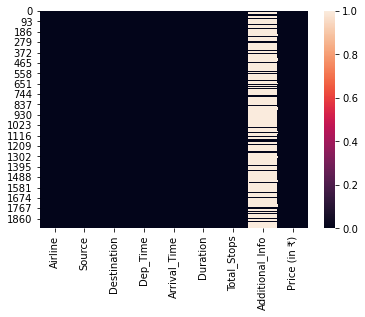

In [54]:
#To check missing values
sns.heatmap(flight_df.isnull())

In [55]:
#To check percent of missing data in column Additional info
flight_df['Additional_Info']. isnull(). sum() * 100 / len(flight_df['Additional_Info'])

78.64476386036961

Here we can see almost 78% of data is missing from Additional_info column. So rather than replacing the nana value with simple imputer, we will drop the Additional info column.

In [56]:
flight_df.drop('Additional_Info', axis=1, inplace=True)
flight_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price (in ₹)
0,Air India,New Delhi,Mumbai,07:00,09:05,2h 05m,Non Stop,"4,065"
1,Air India,New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,"4,065"
2,Air India,New Delhi,Mumbai,09:00,11:15,2h 15m,Non Stop,"4,065"
3,Air India,New Delhi,Mumbai,14:00,16:15,2h 15m,Non Stop,"4,065"
4,Air India,New Delhi,Mumbai,21:15,23:35,2h 20m,Non Stop,"4,065"


## EDA

In [57]:
#Checking the unique values counts in the columns
obj_col = flight_df.select_dtypes(include= "object")
for i in obj_col.columns:
    print(i)
    print(obj_col[i].value_counts(),"\n")

Airline
IndiGo          852
Air Asia        349
Vistara         315
Go First        238
Air India        79
SpiceJet         78
Alliance Air     33
FlyBig            4
Name: Airline, dtype: int64 

Source
Mumbai       416
Bangalore    367
New Delhi    363
Hyderabad    324
Kolkata      301
Pune         145
Chennai       32
Name: Source, dtype: int64 

Destination
Bangalore        232
New Delhi        197
Hyderabad        196
Chennai          155
Mumbai           129
Goa              108
Guwahati         102
Pune              96
Kolkata           93
Chandigarh        78
Bagdogra          78
Lucknow           73
Varanasi          70
Jaipur            61
Dehradun          55
Ahmedabad         46
Kochi             38
Visakhapatnam     32
Patna             30
Srinagar          30
Tirupati          28
Port Blair        21
Name: Destination, dtype: int64 

Dep_Time
09:30    50
05:45    33
06:30    30
06:05    30
08:00    28
         ..
21:25     2
02:00     2
10:55     2
09:40     2
14:55     

Conclusion:
    
1. we have multiple airlines data, top 3 airlines names are Indigo, AirAsia and Vistara.
2. Date column has to be converted into datetime columns and date and month from the date needs to be separated for analysin.
3. Major sources of the flights are from major 4 cities i.e. Mumbai, Bangalore, Delhi and Hydrabad.And their destination is also to major cities i.e. Bangalore,New Delhi, Hydrabad and Chennai.
4. Arrival time columns as multiple observations , it has hours, minutes 
6. Duration is shown in hours and minutes.
7. Totat stops tells that how many stops a flight takes. Most of the flights have no stop. Next to it are the flights which are having 1 stop.

### Creating features by seprating Dep_hour and Dep_min from Departure Time and Arrival Time

#### Departure Time

In [58]:
# Departure time is when a plane leaves the gate. 

# Extracting Hours
flight_df["Dep_hour"] = pd.to_datetime(flight_df["Dep_Time"]).dt.hour

# Extracting Minutes
flight_df["Dep_min"] = pd.to_datetime(flight_df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
flight_df.drop(["Dep_Time"], axis = 1, inplace = True)


#### Arrival Time

In [59]:
# Arrival time is when the plane pulls up to the gate.

# Extracting Hours
flight_df["Arrival_hour"] = pd.to_datetime(flight_df['Arrival_Time']).dt.hour

# Extracting Minutes
flight_df["Arrival_min"] = pd.to_datetime(flight_df['Arrival_Time']).dt.minute

# Now we can drop Arrival_Time as it is of no use
flight_df.drop(["Arrival_Time"], axis = 1, inplace = True)


In [60]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price (in ₹),Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Air India,New Delhi,Mumbai,2h 05m,Non Stop,"4,065",7,0,9,5
1,Air India,New Delhi,Mumbai,2h 10m,Non Stop,"4,065",8,0,10,10
2,Air India,New Delhi,Mumbai,2h 15m,Non Stop,"4,065",9,0,11,15
3,Air India,New Delhi,Mumbai,2h 15m,Non Stop,"4,065",14,0,16,15
4,Air India,New Delhi,Mumbai,2h 20m,Non Stop,"4,065",21,15,23,35


### Extracting the hours and min from the Duration column

In [61]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time
# Assigning and converting Duration column into list

duration = list(flight_df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
             duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]
duration_hrs = []
duration_min = []

for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split("h")[0]))
    duration_min.append(int(duration[i].split("m")[0].split()[-1]))

In [62]:
flight_df["Duration_hours"] = duration_hrs
flight_df["Duration_Min"] = duration_hrs
flight_df.drop("Duration",axis = 1,inplace = True)

In [63]:
flight_df.head(2)

,Airline,Source,Destination,Total_Stops,Price (in ₹),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,Air India,New Delhi,Mumbai,Non Stop,"4,065",7,0,9,5,2,2
1,Air India,New Delhi,Mumbai,Non Stop,"4,065",8,0,10,10,2,2


In [64]:
# Replacing Total_Stops
flight_df.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2}, inplace = True)

In [65]:
flight_df.head(2)

,Airline,Source,Destination,Total_Stops,Price (in ₹),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,Air India,New Delhi,Mumbai,0,"4,065",7,0,9,5,2,2
1,Air India,New Delhi,Mumbai,0,"4,065",8,0,10,10,2,2


In [66]:
def convert_price(flight_df):
    flight_df['Price (in ₹)'] = flight_df['Price (in ₹)'].str.replace(',', '') # these two lines remove unwanted symbols. Leaving me with a '1100.00' for example
    flight_df['Price (in ₹)'] = flight_df['Price (in ₹)'].astype('int64') # convert data to int. 
    return flight_df

In [67]:
print(convert_price(flight_df))

        Airline     Source Destination  Total_Stops  Price (in ₹)  Dep_hour  \
0     Air India  New Delhi      Mumbai            0          4065         7   
1     Air India  New Delhi      Mumbai            0          4065         8   
2     Air India  New Delhi      Mumbai            0          4065         9   
3     Air India  New Delhi      Mumbai            0          4065        14   
4     Air India  New Delhi      Mumbai            0          4065        21   
...         ...        ...         ...          ...           ...       ...   
1943     IndiGo    Kolkata    Bagdogra            0          5242        12   
1944   Go First    Kolkata        Pune            0          4975        10   
1945     IndiGo    Kolkata        Pune            0          4976        21   
1946     IndiGo    Kolkata        Pune            1          5720         9   
1947   Go First    Kolkata        Pune            1          6882         9   

      Dep_min  Arrival_hour  Arrival_min  Duration_

In [68]:
flight_df.head(2)

,Airline,Source,Destination,Total_Stops,Price (in ₹),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,Air India,New Delhi,Mumbai,0,4065,7,0,9,5,2,2
1,Air India,New Delhi,Mumbai,0,4065,8,0,10,10,2,2


In [69]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         1948 non-null   object
 1   Source          1948 non-null   object
 2   Destination     1948 non-null   object
 3   Total_Stops     1948 non-null   int64 
 4   Price (in ₹)    1948 non-null   int64 
 5   Dep_hour        1948 non-null   int64 
 6   Dep_min         1948 non-null   int64 
 7   Arrival_hour    1948 non-null   int64 
 8   Arrival_min     1948 non-null   int64 
 9   Duration_hours  1948 non-null   int64 
 10  Duration_Min    1948 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 167.5+ KB


# Univariate Analysis:

In [70]:
flight_df["Price (in ₹)"].describe()

count    1948.000000
mean     5199.128337
std      1355.415178
min      2692.000000
25%      4352.000000
50%      4768.000000
75%      6269.750000
max      9500.000000
Name: Price (in ₹), dtype: float64

<AxesSubplot:>

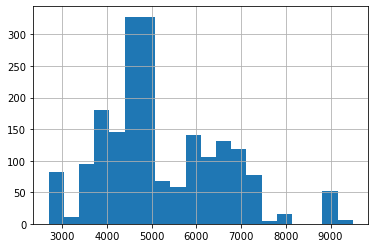

In [71]:
#histogram
flight_df['Price (in ₹)'].hist(bins = 20)

In [72]:
#skewness & kurtosis
print("Skewness: %f" % flight_df['Price (in ₹)'].skew())
print("Kurtosis: %f" % flight_df['Price (in ₹)'].kurt())

Skewness: 0.789319
Kurtosis: 0.465031


In [73]:
# For numerical columns
flight_df.describe()

,Total_Stops,Price (in ₹),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
count,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000
mean,0.260267,5199.128337,11.107803,26.434805,14.445072,28.521561,2.950719,2.950719
std,0.458355,1355.415178,5.698798,17.495538,5.293304,16.749033,2.738497,2.738497
min,0.000000,2692.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,4352.000000,6.000000,10.000000,10.000000,15.000000,1.000000,1.000000
50%,0.000000,4768.000000,10.000000,30.000000,14.000000,25.000000,2.000000,2.000000
75%,1.000000,6269.750000,16.000000,40.000000,19.000000,45.000000,3.000000,3.000000
max,2.000000,9500.000000,22.000000,55.000000,23.000000,55.000000,14.000000,14.000000


## Handling Categorical Data

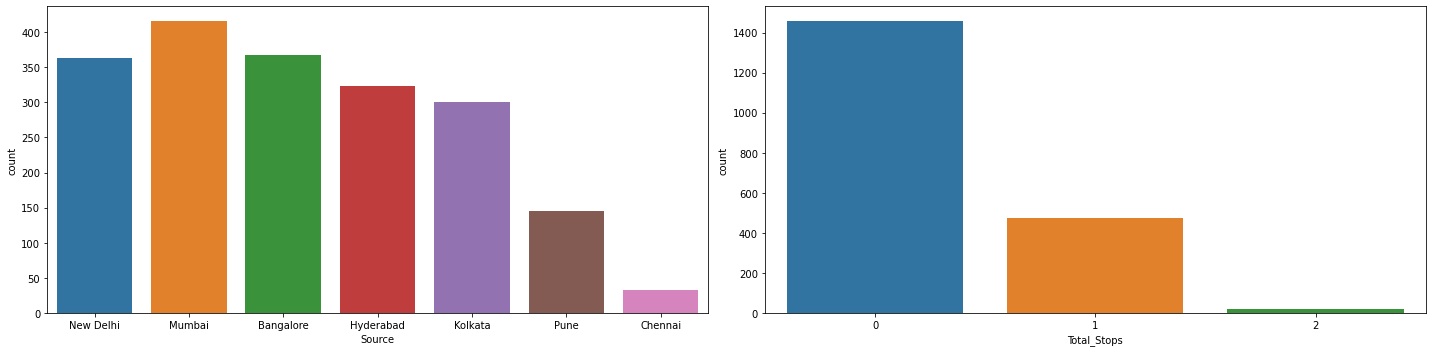

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot('Source',data=flight_df)
plt.subplot(1,2,2)
sns.countplot('Total_Stops',data=flight_df)
plt.tight_layout()    
plt.show()

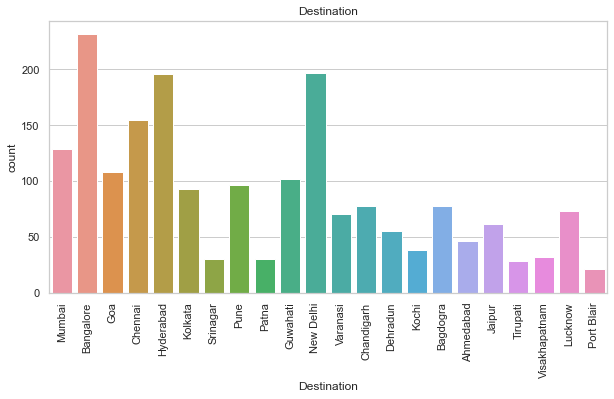

In [75]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(flight_df.Destination)
plt.title("Destination")
plt.xticks(rotation=90)
plt.show()

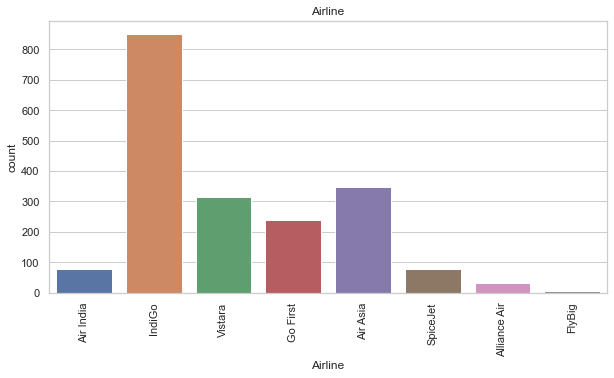

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(flight_df.Airline)
plt.title("Airline")
plt.xticks(rotation=90)
plt.show()

**Conclusion:**
1.	Most of the flight’s source is Mumbai, followed by Bangalore and maximum flight’s has destination as Bangalore followed by New Delhi and Hyderabad.
2.	Maximum flights are having 0 stop only followed by one stop.

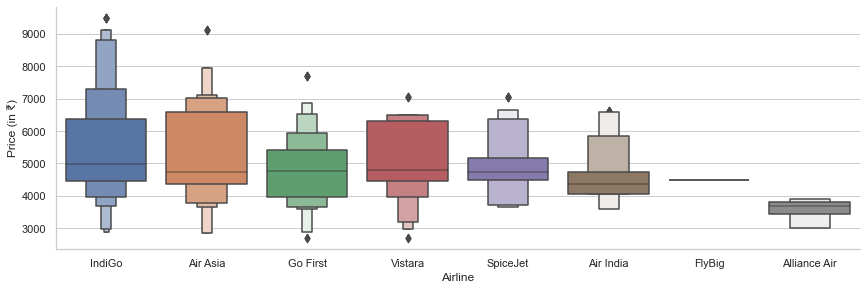

In [77]:
# Airline vs Price
sns.catplot(y = "Price (in ₹)", x = "Airline", data = flight_df.sort_values("Price (in ₹)", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

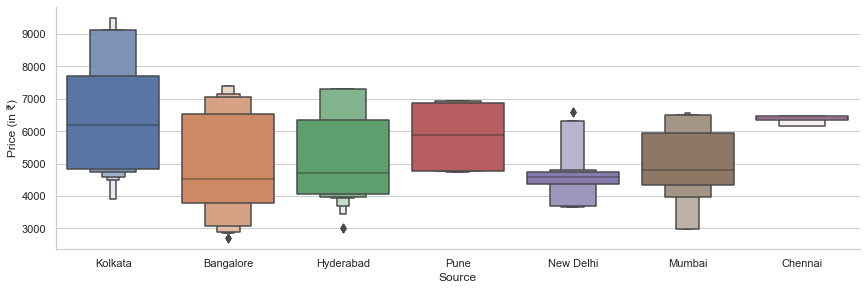

In [78]:
# Source vs Price
sns.catplot(y='Price (in ₹)',x='Source',data=flight_df.sort_values('Price (in ₹)', ascending=False),kind='boxen',height=4,aspect=3)
plt.show()

<AxesSubplot:xlabel='Source,Destination'>

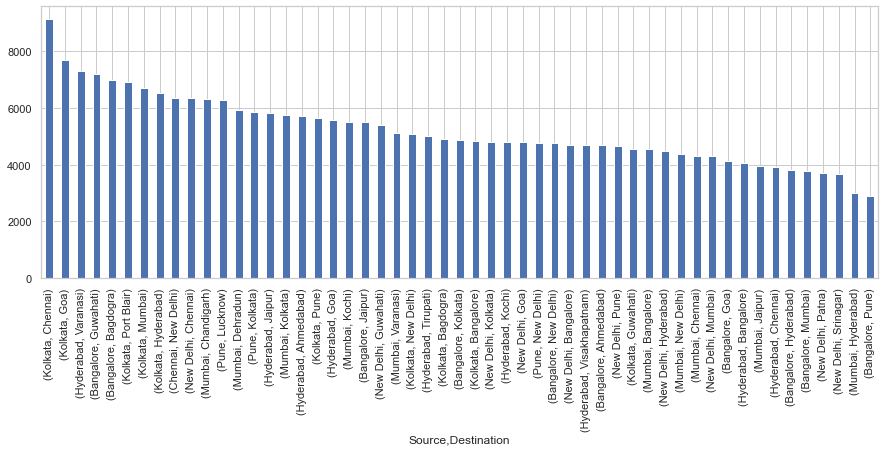

In [79]:
plt.figure(figsize =(15,5))
flight_df.groupby(["Source","Destination"])["Price (in ₹)"].mean().sort_values(ascending= False).plot(kind = "bar")

Flights starting from Kolkata are having highest price and flight starting from Chennai are having lowest price.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price (in ₹)'>

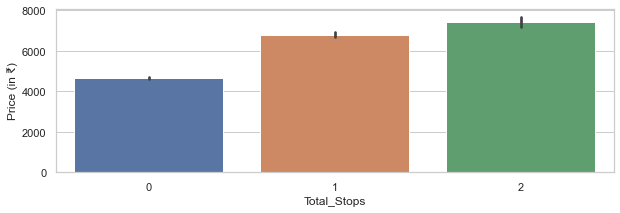

In [80]:
plt.figure(figsize=(10,3))
sns.barplot(x = "Total_Stops", y = "Price (in ₹)", data = flight_df)

## Label Encoding

In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

flight_df["Airline"] = le.fit_transform(flight_df["Airline"])
flight_df["Source"] = le.fit_transform(flight_df["Source"])
flight_df["Destination"] = le.fit_transform(flight_df["Destination"])

In [82]:
flight_df.head()

,Airline,Source,Destination,Total_Stops,Price (in ₹),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,1,5,13,0,4065,7,0,9,5,2,2
1,1,5,13,0,4065,8,0,10,10,2,2
2,1,5,13,0,4065,9,0,11,15,2,2
3,1,5,13,0,4065,14,0,16,15,2,2
4,1,5,13,0,4065,21,15,23,35,2,2


<AxesSubplot:xlabel='Price (in ₹)', ylabel='Duration_hours'>

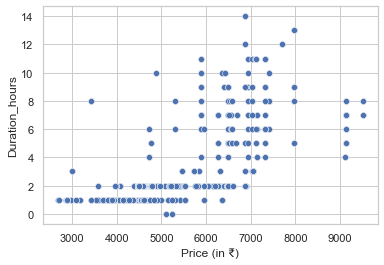

In [83]:
plt.figure(figsize=(6,4))
sns.scatterplot(x ="Price (in ₹)", y = "Duration_hours" , data = flight_df)

## Correlation Map

In [84]:
flight_df.corr()

,Airline,Source,Destination,Total_Stops,Price (in ₹),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
Airline,1.000000,0.079400,0.067949,-0.092646,0.026869,0.023090,0.039524,-0.016428,0.113515,-0.069039,-0.069039
Source,0.079400,1.000000,0.052026,0.041652,0.015402,-0.074961,-0.036914,-0.035666,0.012360,0.089344,0.089344
Destination,0.067949,0.052026,1.000000,-0.060159,-0.124848,-0.035203,0.047768,-0.040378,0.057803,-0.001285,-0.001285
Total_Stops,-0.092646,0.041652,-0.060159,1.000000,0.688470,-0.340888,0.014895,0.097664,-0.027793,0.888334,0.888334
Price (in ₹),0.026869,0.015402,-0.124848,0.688470,1.000000,-0.283668,0.016823,0.058745,-0.064537,0.689016,0.689016
Dep_hour,0.023090,-0.074961,-0.035203,-0.340888,-0.283668,1.000000,-0.068881,0.874232,-0.008661,-0.384387,-0.384387
Dep_min,0.039524,-0.036914,0.047768,0.014895,0.016823,-0.068881,1.000000,-0.014996,0.014736,0.006837,0.006837
Arrival_hour,-0.016428,-0.035666,-0.040378,0.097664,0.058745,0.874232,-0.014996,1.000000,-0.082253,0.104054,0.104054
Arrival_min,0.113515,0.012360,0.057803,-0.027793,-0.064537,-0.008661,0.014736,-0.082253,1.000000,-0.044589,-0.044589
Duration_hours,-0.069039,0.089344,-0.001285,0.888334,0.689016,-0.384387,0.006837,0.104054,-0.044589,1.000000,1.000000


<AxesSubplot:>

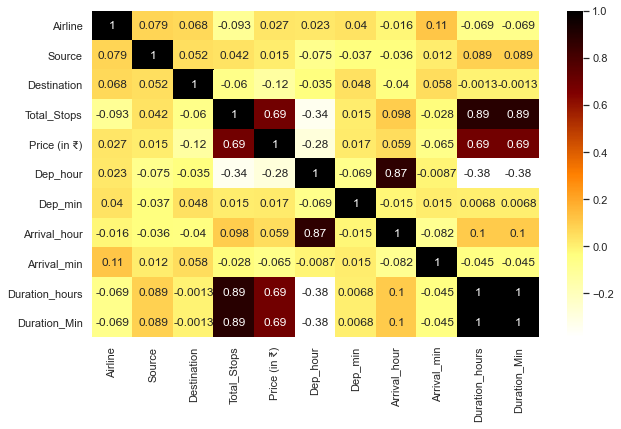

In [85]:
plt.figure(figsize =(10,6))
sns.heatmap(flight_df.corr(),annot= True, cmap = "afmhot_r")

**Conclusion:**

1. Total_stops ,Duration Minutes and Duration_hours have positive correlation with Target column. 
2. Total_stops and Duration hours are also correlation but we will keep the same in the dataset because there are only two which reflect maximum variance.


## Check For Skewness

In [86]:
x=flight_df.drop('Price (in ₹)', axis=1)
y=flight_df['Price (in ₹)']
x

,Airline,Source,Destination,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,1,5,13,0,7,0,9,5,2,2
1,1,5,13,0,8,0,10,10,2,2
2,1,5,13,0,9,0,11,15,2,2
3,1,5,13,0,14,0,16,15,2,2
4,1,5,13,0,21,15,23,35,2,2
...,...,...,...,...,...,...,...,...,...,...
1943,5,3,1,0,12,30,13,45,1,1
1944,4,3,17,0,10,20,13,5,2,2
1945,5,3,17,0,21,5,23,40,2,2
1946,5,3,17,1,9,15,13,10,3,3


In [87]:
# Cheking Skewness
x.skew().sort_values(ascending=False)

Duration_hours    1.625229
Duration_Min      1.625229
Total_Stops       1.362949
Destination       0.302640
Dep_hour          0.170535
Arrival_min       0.031550
Dep_min          -0.006688
Arrival_hour     -0.081766
Source           -0.321417
Airline          -0.781667
dtype: float64

In [88]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [89]:
type(x_new)

numpy.ndarray

In [90]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_Min'],
      dtype='object')

In [91]:
x=pd.DataFrame(x_new, columns=x.columns)
x

,Airline,Source,Destination,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,-1.394812,1.041147,0.764555,-0.579711,-0.668123,-1.753910,-1.026126,-1.489669,0.049042,0.049042
1,-1.394812,1.041147,0.764555,-0.579711,-0.479080,-1.753910,-0.832771,-1.084149,0.049042,0.049042
2,-1.394812,1.041147,0.764555,-0.579711,-0.295993,-1.753910,-0.640669,-0.730345,0.049042,0.049042
3,-1.394812,1.041147,0.764555,-0.579711,0.551963,-1.753910,0.304415,-0.730345,0.049042,0.049042
4,-1.394812,1.041147,0.764555,-0.579711,1.612285,-0.504946,1.595214,0.450538,0.049042,0.049042
...,...,...,...,...,...,...,...,...,...,...
1943,0.318665,-0.033124,-1.634581,-0.579711,0.224370,0.314670,-0.259794,0.963986,-1.044356,-1.044356
1944,-0.171628,-0.033124,1.290541,-0.579711,-0.118106,-0.210862,-0.259794,-1.489669,0.049042,0.049042
1945,0.318665,-0.033124,1.290541,-0.579711,1.612285,-1.215818,1.595214,0.711777,0.049042,0.049042
1946,0.318665,-0.033124,1.290541,1.722724,-0.295993,-0.504946,-0.259794,-1.084149,0.611479,0.611479


In [92]:
# Again Cheking Skewness if it has been removed 
x.skew().sort_values(ascending=False)

Total_Stops       1.146249
Duration_hours    0.126515
Duration_Min      0.126515
Dep_hour         -0.104519
Arrival_hour     -0.122206
Destination      -0.136892
Arrival_min      -0.258910
Source           -0.296870
Dep_min          -0.389752
Airline          -0.514544
dtype: float64

In [93]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness is removed.

### Checking Outliers

Airline              AxesSubplot(0.125,0.536818;0.133621x0.343182)
Source            AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Destination        AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Total_Stops       AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Dep_hour          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Dep_min                 AxesSubplot(0.125,0.125;0.133621x0.343182)
Arrival_hour         AxesSubplot(0.285345,0.125;0.133621x0.343182)
Arrival_min           AxesSubplot(0.44569,0.125;0.133621x0.343182)
Duration_hours       AxesSubplot(0.606034,0.125;0.133621x0.343182)
Duration_Min         AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

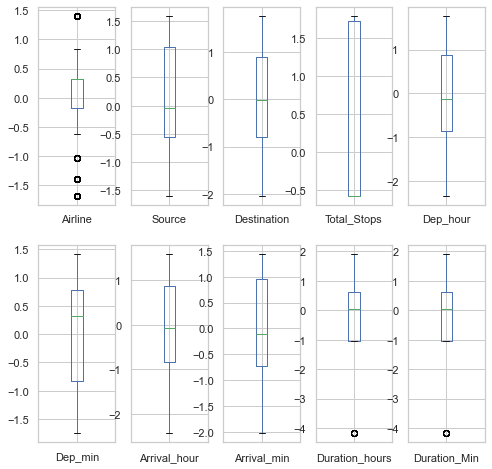

In [95]:
x.plot(kind='box',subplots=True,layout=(2,5),figsize=(8,8))

# Features Scaling / Standard Scaler:

In [50]:
# Performing Standard scaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [51]:
X

array([[-1.39481233,  1.04114663,  0.76455477, ..., -1.48966862,
         0.04904176,  0.04904176],
       [-1.39481233,  1.04114663,  0.76455477, ..., -1.08414886,
         0.04904176,  0.04904176],
       [-1.39481233,  1.04114663,  0.76455477, ..., -0.73034527,
         0.04904176,  0.04904176],
       ...,
       [ 0.31866501, -0.03312358,  1.29054104, ...,  0.71177723,
         0.04904176,  0.04904176],
       [ 0.31866501, -0.03312358,  1.29054104, ..., -1.08414886,
         0.61147925,  0.61147925],
       [-0.17162813, -0.03312358,  1.29054104, ..., -1.48966862,
         1.66897404,  1.66897404]])

## Finding Best Random State

In [52]:
maxScore = 0
maxRS = 0

for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('Best score is',maxScore,'on Random State',maxRS)

Best score is 0.6494313332521702 on Random State 124


In [53]:
model = [LinearRegression(),Lasso(alpha=1.0),Ridge(alpha=1.0),DecisionTreeRegressor(criterion='squared_error'),
         KNeighborsRegressor()]
for i in model:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.2, random_state =maxRS)
    i.fit(X_train1,y_train1)
    pred = i.predict(X_test1)
    print('Train Score of', i , 'is:' , i.score(X_train1,y_train1))
    print("r2_score", r2_score(y_test1, pred))
    print("mean_squred_error", mean_squared_error(y_test1, pred))
    print("RMSE", np.sqrt(mean_squared_error(y_test1, pred)),"\n")

Train Score of LinearRegression() is: 0.5648093647501061
r2_score 0.6494313332521702
mean_squred_error 617187.0652469436
RMSE 785.612541426716 

Train Score of Lasso() is: 0.5647849750028762
r2_score 0.6493976214073971
mean_squred_error 617246.4160004853
RMSE 785.6503140713974 

Train Score of Ridge() is: 0.5648092779789935
r2_score 0.6494509278223357
mean_squred_error 617152.5683953927
RMSE 785.5905857349569 

Train Score of DecisionTreeRegressor() is: 0.9972975535231607
r2_score 0.9923616711534731
mean_squred_error 13447.516025641025
RMSE 115.96342537904366 

Train Score of KNeighborsRegressor() is: 0.9314382366095284
r2_score 0.7978593093899049
mean_squred_error 355874.9866666667
RMSE 596.5525849970535 



### Conclusions:

Have checked Multiple Model and their score also. I have found that DecisionTreeRegressor() is working well on the dataset and have given less RMSE score . Now i will check with ensemble method to boost up score.

## Using Ensemble Technique to boostup score

### RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=maxRS,criterion='squared_error', min_samples_split=2, min_samples_leaf=1)
#RandomForestClassifier(100)---Default
rf.fit(X_train1,y_train1)
predrf=rf.predict(X_test1)
print('Train Score of', rf , 'is:' , rf.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predrf))
print("mean_squred_error", mean_squared_error(y_test1, predrf))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predrf)))

Train Score of RandomForestRegressor(random_state=124) is: 0.9957430019522039
r2_score 0.9866703484841391
mean_squred_error 23467.266986973325
RMSE 153.19029664757923


### AdaBoostRegressor

In [55]:
from sklearn.ensemble import AdaBoostRegressor

ABr=AdaBoostRegressor( base_estimator=DecisionTreeRegressor(),n_estimators=50,learning_rate=1.0,loss='linear',random_state=maxRS,)
#RandomForestClassifier(50)---Default
ABr.fit(X_train1,y_train1)
predAbr=ABr.predict(X_test1)
print('Train Score of', ABr , 'is:' , ABr.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predAbr))
print("mean_squred_error", mean_squared_error(y_test1, predAbr))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predAbr)))

Train Score of AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=124) is: 0.9961570396869603
r2_score 0.9944539392101273
mean_squred_error 9764.012894640458
RMSE 98.81301986398583


### GradientBoostingRegressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

Gradient_Boost=GradientBoostingRegressor(n_estimators=100,loss='squared_error',learning_rate=0.1,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1)
#GradientBoostingRegressor(100)---Default
Gradient_Boost.fit(X_train1,y_train1)
predgb=Gradient_Boost.predict(X_test1)
print('Train Score of', Gradient_Boost , 'is:' , Gradient_Boost.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predgb))
print("mean_squred_error", mean_squared_error(y_test1, predgb))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predgb)),"\n")

Train Score of GradientBoostingRegressor() is: 0.9135786715106335
r2_score 0.9003430013998592
mean_squred_error 175449.25240447314
RMSE 418.8666284206384 



## Hyper Parameter Tuning

In [57]:
Ada_Boost = AdaBoostRegressor()
Para ={'n_estimators' : [50, 100, 150, 200],
        'learning_rate' : [0.001, 0.01, 0.1, 1],
        'loss' : ["linear", "square", "exponential"],
        'random_state' : [21, 42, 104, 111]
        }
Ada_search = RandomizedSearchCV(Ada_Boost,Para,cv = 5,scoring = "r2",n_jobs =-1,verbose = 2) 
Ada_search.fit(X_train1,y_train1)
print(Ada_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'random_state': 111, 'n_estimators': 50, 'loss': 'linear', 'learning_rate': 1}


In [58]:
prediction = Ada_search.predict(X_test1)

In [59]:
FlightPrice = AdaBoostRegressor(n_estimators= 50, loss= 'linear', learning_rate =1, random_state=111)
FlightPrice.fit(x_train, y_train)
pred = FlightPrice.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 75.08080097429422
RMSE value: 667.8138380332518


### Plotting the residuals

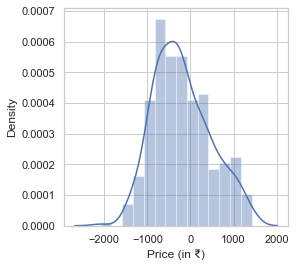

In [62]:
plt.figure(figsize = (4,4))
sns.distplot(y_test1-prediction)
plt.show()

## Cross Validation

In [63]:
best_Ada_Boost = AdaBoostRegressor(n_estimators= 50, loss= 'linear', learning_rate =1, random_state=111)

for i in range(2,11):
    cross_score = cross_val_score(best_Ada_Boost,X,y,cv = i,n_jobs = -1) 
    print(i,"mean",cross_score.mean() ,"and STD" , cross_score.std())

2 mean 0.7079885311697873 and STD 0.03750158080833105
3 mean 0.6896722276958461 and STD 0.08054815896823123
4 mean 0.6978318289655345 and STD 0.08159298797693146
5 mean 0.6807099102493558 and STD 0.09614381233553472
6 mean 0.6702078159005903 and STD 0.09881004588221423
7 mean 0.6332033699475218 and STD 0.15776782167766093
8 mean 0.6339620102070194 and STD 0.17464143798158782
9 mean 0.6189491793496691 and STD 0.18593627306154722
10 mean 0.6326366873127885 and STD 0.19414716310795876


In [64]:
# Cross validate of AdaBoostRegressor using cv=5
from sklearn.model_selection import cross_val_score
score=cross_val_score(best_Ada_Boost,X,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

Score: [0.51750106 0.6563048  0.69478879 0.72429181 0.81066309]
Mean Score: 0.6807099102493558
Standard Deviation: 0.09614381233553472


### Plotting y_test vs predictions

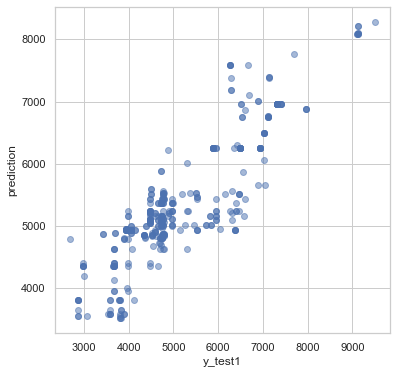

In [65]:
plt.figure(figsize = (6,6))
plt.scatter(y_test1, prediction, alpha = 0.5,)
plt.xlabel("y_test1")
plt.ylabel("prediction")
plt.show()

## Saving Model

In [67]:
import pickle
# Saving the AdaBoostRegressor
best_Ada_Boost.fit(X,y)
pred = best_Ada_Boost.predict(X_test1)

# Saving model

filename = "Flight_ticket_price_Prediction.pkl"

## Conclusion

I have scraped the FLight ticket price from Yatra.com for different source and destination cities in India. . All independent variables are categorical in nature and dependent variable i.e price is also object data type. So i changed the data type of price to integer and apply regressoin method for prediction.

Once data has been cleaned, Label encoding applied on them to convert them into Numerical one.I have tried best algorithm and it has given top 5 features, i trained model on them but for most of the models, train and test data was having high variance, The model was overfitting.

Only AdaBoostregressor worked well out of all the models, as there was less difference between train score and test score and RMSE was also low.I have it as final model and have done further procesing. I got the r2 score as 75% after hyper parameter tuning which is a good score.